<a href="https://colab.research.google.com/github/fmuranda/Climate_Science./blob/main/tutorials/W2D3_ExtremesandVariability/student/W2D3_Tutorial4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/neuromatch/climate-course-content/blob/main/tutorials/W2D3_ExtremesandVariability/student/W2D3_Tutorial4.ipynb) &nbsp; <a href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/neuromatch/climate-course-content/main/tutorials/W2D3_ExtremesandVariability/student/W2D3_Tutorial4.ipynb" target="_parent"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open in Kaggle"/></a>

# Tutorial 4: Return Levels Using Normal and GEV Distributions

**Week 2, Day 3, Extremes & Variability**

**Content creators:** Matthias Aengenheyster, Joeri Reinders

**Content reviewers:** Younkap Nina Duplex, Sloane Garelick, Paul Heubel, Zahra Khodakaramimaghsoud, Peter Ohue, Laura Paccini, Jenna Pearson, Agustina Pesce, Derick Temfack, Peizhen Yang, Cheng Zhang, Chi Zhang, Ohad Zivan

**Content editors:** Paul Heubel, Jenna Pearson, Chi Zhang, Ohad Zivan

**Production editors:** Wesley Banfield, Paul Heubel, Jenna Pearson, Konstantine Tsafatinos, Chi Zhang, Ohad Zivan

**Our 2024 Sponsors:** CMIP, NFDI4Earth

# Tutorial Objectives

*Estimated timing of tutorial:* 30 minutes

Now that we have learned how to create a probability density function (PDF) for the generalized extreme value (GEV) distribution, we can utilize it to calculate return values based on this distribution.

Return levels are computed from a PDF using the [cumulative distribution function (CDF)](https://en.wikipedia.org/wiki/Cumulative_distribution_function), which provides the probability that a randomly drawn variable from our distribution will be less than a certain value X (for our specific variable). Extreme events are rarer, and thus the probability of a precipitation event being at or lower than it is high.  For example, if there is a 99% chance of observing a storm with 80mm of rainfall or lower, it means that there is a 1% chance of observing a storm with at least 80mm of rainfall. This implies that the 100-year storm would bring 80mm of rain. In simple terms, the return level is the inverse of the CDF.

By the end of this tutorial, you will be able to:

- Estimate return levels using a given quantile and the parameters of a GEV distribution.
- Compare return level plots for GEV and normal distributions.

# Setup

In [23]:
# imports
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import pooch
import tempfile
from scipy import stats
from scipy.stats import genextreme as gev

In [24]:
# @title Install and import feedback gadget

!pip3 install vibecheck datatops --quiet

from vibecheck import DatatopsContentReviewContainer
def content_review(notebook_section: str):
    return DatatopsContentReviewContainer(
        "",  # No text prompt
        notebook_section,
        {
            "url": "https://pmyvdlilci.execute-api.us-east-1.amazonaws.com/klab",
            "name": "comptools_4clim",
            "user_key": "l5jpxuee",
        },
    ).render()


feedback_prefix = "W2D3_T4"

In [25]:
# @title Figure Settings
import ipywidgets as widgets  # interactive display

%config InlineBackend.figure_format = 'retina'
plt.style.use(
    "https://raw.githubusercontent.com/neuromatch/climate-course-content/main/cma.mplstyle"
)

In [26]:
# @title Helper functions


def pooch_load(filelocation=None, filename=None, processor=None):
    shared_location = "/home/jovyan/shared/Data/tutorials/W2D3_ExtremesandVariability"  # this is different for each day
    user_temp_cache = tempfile.gettempdir()

    if os.path.exists(os.path.join(shared_location, filename)):
        file = os.path.join(shared_location, filename)
    else:
        file = pooch.retrieve(
            filelocation,
            known_hash=None,
            fname=os.path.join(user_temp_cache, filename),
            processor=processor,
        )

    return file

**Please note**: On slide 7, P is defined as the excellence probability, when it should be defined as the cumulative distribution probability P(x<=X). The exceedance probability is 1-P(x<=X) or 1/return period, and the return period is 1/ 1-P(x<=X). Thus a 10 year flood would have exceedance probability of 1/10, not 9/10.

In [27]:
# @title Video 1: Return Levels Using Distributions

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'DZwh4H2TqDs'), ('Bilibili', 'BV1Bh4y1Z7gu')]
tab_contents = display_videos(video_ids, W=730, H=410)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [28]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Return_Levels_Using_Distributions_Video")

In [29]:
# @markdown
from ipywidgets import widgets
from IPython.display import IFrame

link_id = "sdezg"

print(f"If you want to download the slides: https://osf.io/download/{link_id}/")
IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/{link_id}/?direct%26mode=render%26action=download%26mode=render", width=854, height=480)

If you want to download the slides: https://osf.io/download/sdezg/


In [30]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Return_Levels_Using_Distributions_Slides")

# Section 1: Return Levels and Return Period

As before let's load the annual maximum precipitation data from Germany:

In [31]:
# download file: 'precipitationGermany_1920-2022.csv'
filename_precipitationGermany = "precipitationGermany_1920-2022.csv"
url_precipitationGermany = "https://osf.io/xs7h6/download"
data = pd.read_csv(
    pooch_load(url_precipitationGermany, filename_precipitationGermany), index_col=0
).set_index("years")
data.columns = ["precipitation"]
precipitation = data.precipitation

And fit the Generalized Extreme Value (GEV) distribution:

In [32]:
shape, loc, scale = gev.fit(precipitation.values, 0)
print(f"Fitted parameters:\nShape: {shape:.5f}, Location: {loc:.5f}, Scale: {scale:.5f}")

Fitted parameters:
Shape: -0.04714, Location: 26.35358, Scale: 7.36941


To compute return levels, you can use the function ```estimate_return_level(x, location, scale, shape)``` defined below. In this case, x represents the _quantile_, the probability of a random value from our distribution being lower. For example, for the 100-year storm, x would be 0.99, and for the 1000-year storm, it would be 0.999.

This utility function takes a given *quantile* and the GEV parameters (loc, scale, shape) and computes the corresponding return level.

In [33]:
def estimate_return_level(quantile, loc, scale, shape):
    level = loc + scale / shape * (1 - (-np.log(quantile)) ** (shape))
    return level

Now, let's utilize this function to calculate the 2-year return level, which represents the precipitation level we anticipate with a 50% chance each year.

In [34]:
estimate_return_level(0.5, loc, scale, shape)

np.float64(29.07803009997505)

This function is also available as part of the scipy GEV implementation - here called the "Percent point function" or ```ppf``` which you used previously to make the quantile-quantile plots in the last tutorial.

In [35]:
gev.ppf(0.5, shape, loc=loc, scale=scale)

np.float64(29.07803009997506)

To make things easier, let's replace x with the formula $1-(1/\text{return period})$. Note this is different than the exceedance probability discussed in Tutorial 2. So for a 100-year storm, we would use $1-(1/100) = 0.99$.

Let us compute return levels for the 100- and 1000-year storms.

In [36]:
estimate_return_level(1 - 1 / 100, loc, scale, shape)

np.float64(64.20998052543192)

In [37]:
estimate_return_level(1 - 1 / 1000, loc, scale, shape)

np.float64(86.51985389906702)

Now we will make a figure in which we plot return levels against return periods:
1. Create a vector “periods” which is a sequence of 2 to 1000 years (with a step size of 2).
2. Calculate the associated return levels for those return periods.
3. Plot the return levels against the return periods. Typically, the return periods go on the x-axis at a log scale.


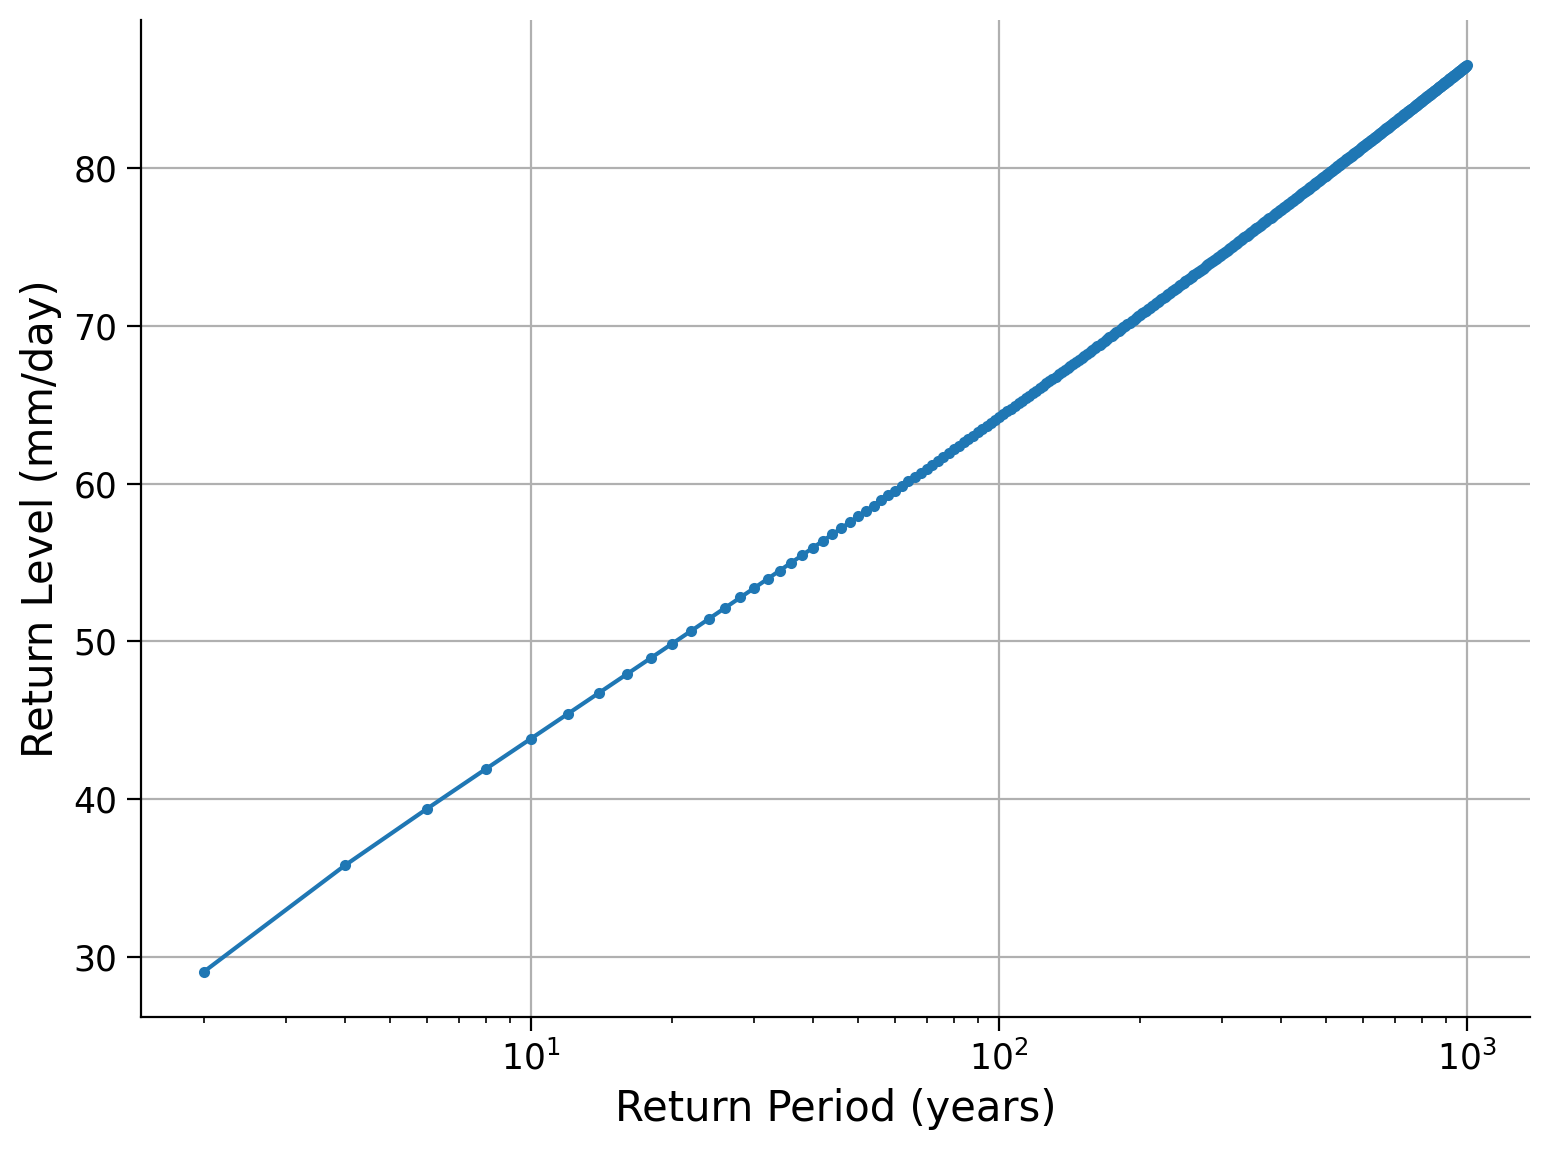

In [38]:
periods = np.arange(2, 1000, 2)
quantiles = 1 - 1 / periods
levels = estimate_return_level(quantiles, loc, scale, shape)

fig, ax = plt.subplots()
ax.plot(periods, levels, ".-")
ax.set_xlabel("Return Period (years)")
ax.set_ylabel("Return Level (mm/day)")
ax.set_xscale("log")
ax.grid(True)

<details>
<summary> <font color='orangered'>Click to see a description of the plot  </font></summary>
Return levels versus return periods calculated from fitted GEV parameters and equal-spaced periods, log scaled on the x-axis. Hence, we can easily access the return level for an X-year event, e.g. 200-year event corresponds to an annual maximum precipitation of 70 millimeters per day.
</details>

## Coding Exercise 1

Compute and plot the 50-, 100-, 500- and 1000-year return levels based on a normal distribution and based on the Normal and GEV distributions.

Plot these three things:
1. the empirical return level
2. the estimate based on a normal distribution
3. the estimate based on a GEV distribution

*Note that you can get the empirical return levels from tutorial 2, we will provide this code below.*

In [39]:
def empirical_return_level(data):
    """
    Compute empirical return level using the algorithm introduced in Tutorial 2
    """
    df = pd.DataFrame(index=np.arange(data.size))
    # sort the data
    df["sorted"] = np.sort(data)[::-1]
    # rank via scipy instead to deal with duplicate values
    df["ranks_sp"] = np.sort(stats.rankdata(-data))
    # find exceedence probability
    n = data.size
    df["exceedance"] = df["ranks_sp"] / (n + 1)
    # find return period
    df["period"] = 1 / df["exceedance"]

    df = df[::-1]

    out = xr.DataArray(
        dims=["period"],
        coords={"period": df["period"]},
        data=df["sorted"],
        name="level",
    )
    return out

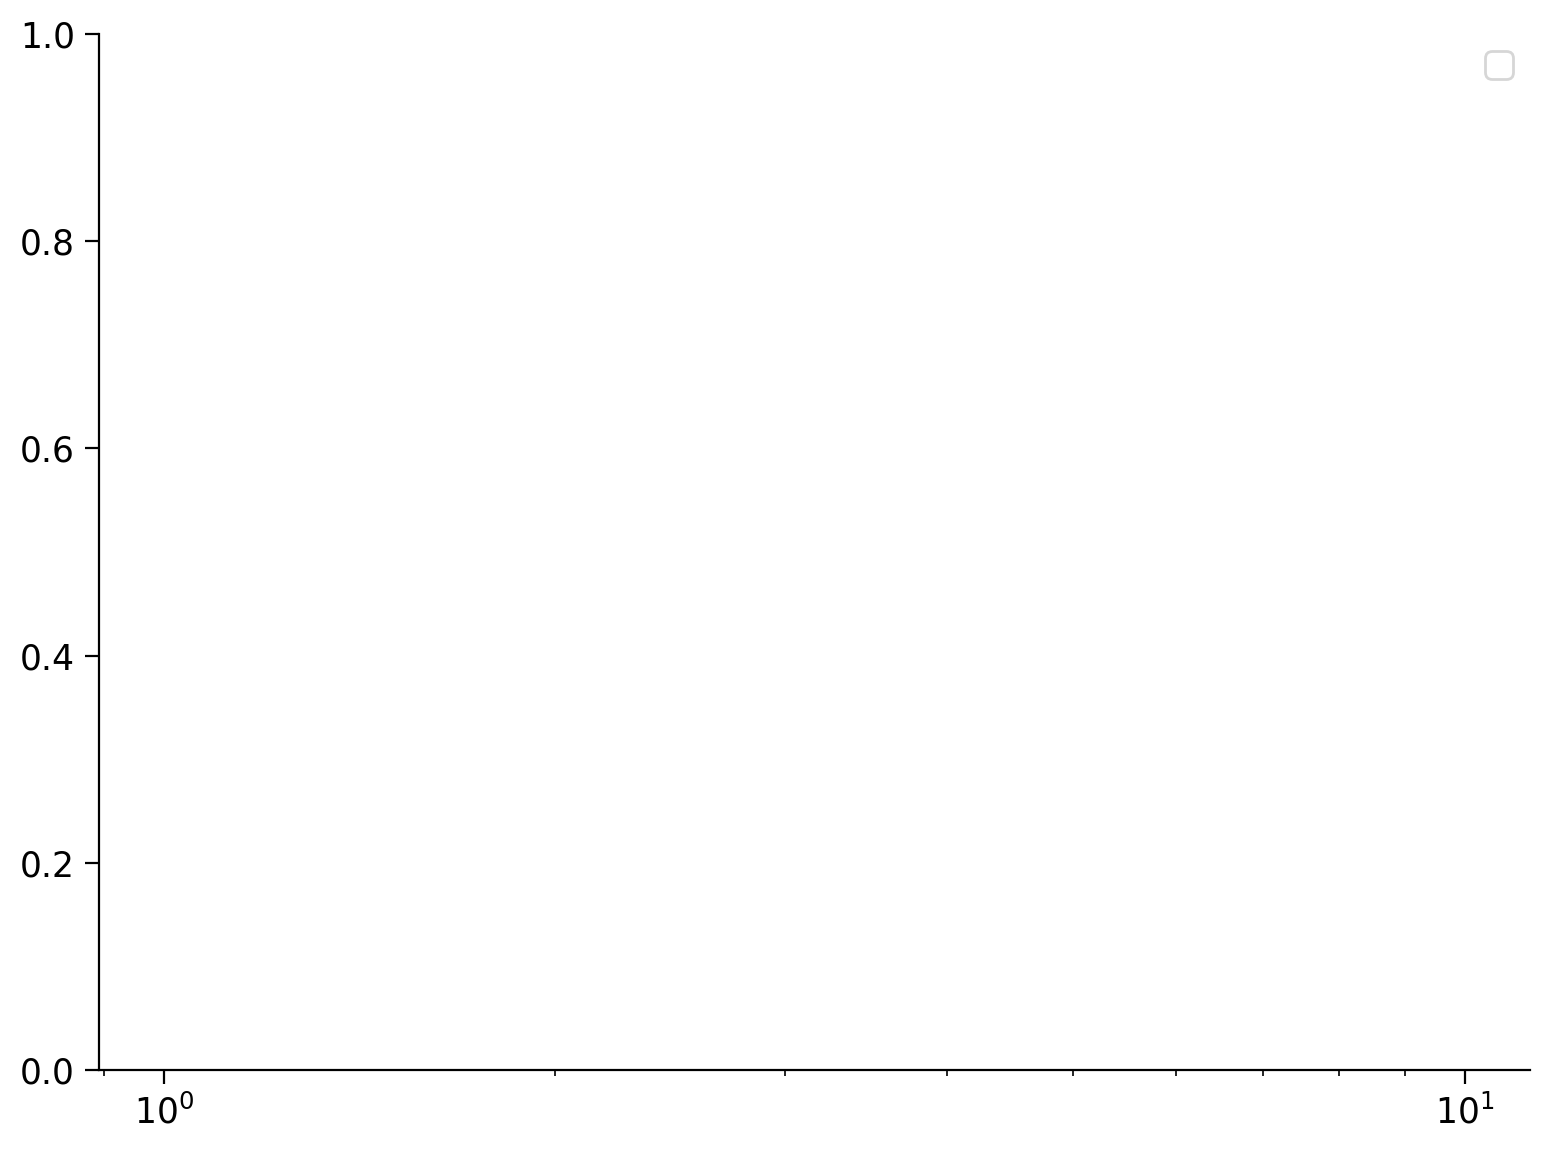

In [40]:
# setup plots
fig, ax = plt.subplots()

# get empirical return levels and plot them
_ = ...

# create vector of years
years = np.arange(1.1, 100, 0.1)

# calculate and plot the normal return levels
_ = ...

# calculate and plot the GEV distribution, note the negtive shape parameter
_ = ...

# set x axis to log scale
ax.set_xscale("log")

# show legend
ax.legend(["empirical", "normal", "GEV"])

[*Click for solution*](https://github.com/neuromatch/climate-course-content/tree/main/tutorials/W2D3_ExtremesandVariability/solutions/W2D3_Tutorial4_Solution_024bdc70.py)

*Example output:*

<img alt='Solution hint' align='left' width=775.0 height=575.0 src=https://raw.githubusercontent.com/neuromatch/climate-course-content/main/tutorials/W2D3_ExtremesandVariability/static/W2D3_Tutorial4_Solution_024bdc70_1.png>



In [41]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Coding_Exercise_1")

## Question 1

1. What can you say about the plot and how the distributions describe the data? How do the distributions differ? At short/long return periods? What will happen at even longer return periods?

[*Click for solution*](https://github.com/neuromatch/climate-course-content/tree/main/tutorials/W2D3_ExtremesandVariability/solutions/W2D3_Tutorial4_Solution_33475dec.py)



In [42]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Questions_1")

## Bonus: Find Confidence Intervals

When computing return levels of extreme events - or really when doing any quantitative assessment in science - it is useful and essential to provide uncertainty estimates, that is how much the result may be expected to fluctuate around the central estimate.

In Tutorial 2 the exercise discussed one approach to construct such uncertainty ranges - bootstrapping. You can now extend this method by resampling the data and re-fitting the GEV, and in doing so generate uncertainty estimates of the GEV parameters and GEV-based return levels.

One possible approach could involve the following steps:

1. Begin with the `gev` class which can be employed to fit GEV parameters using the `gev.fit(data)` method. This function returns the three parameters, taking note of a sign change in the shape parameter (as different conventions exist).
2. Determine the number of observations in the data, denoted as N.
3. Perform resampling by randomly drawing N samples from the data with replacement. This process generates an artificial ensemble that differs from the true data due to resampling.
4. Estimate the parameters for each resampling.
5. Utilize the `gev.ppf()` function for each parameter set to compute the return level.
6. Visualize the resulting uncertainty bands by plotting multiple lines or calculating confidence intervals using `np.quantile()`.

Mean estimate:  nan  and 95% confidence intervals:  Ellipsis


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'Return Level (mm/day)')

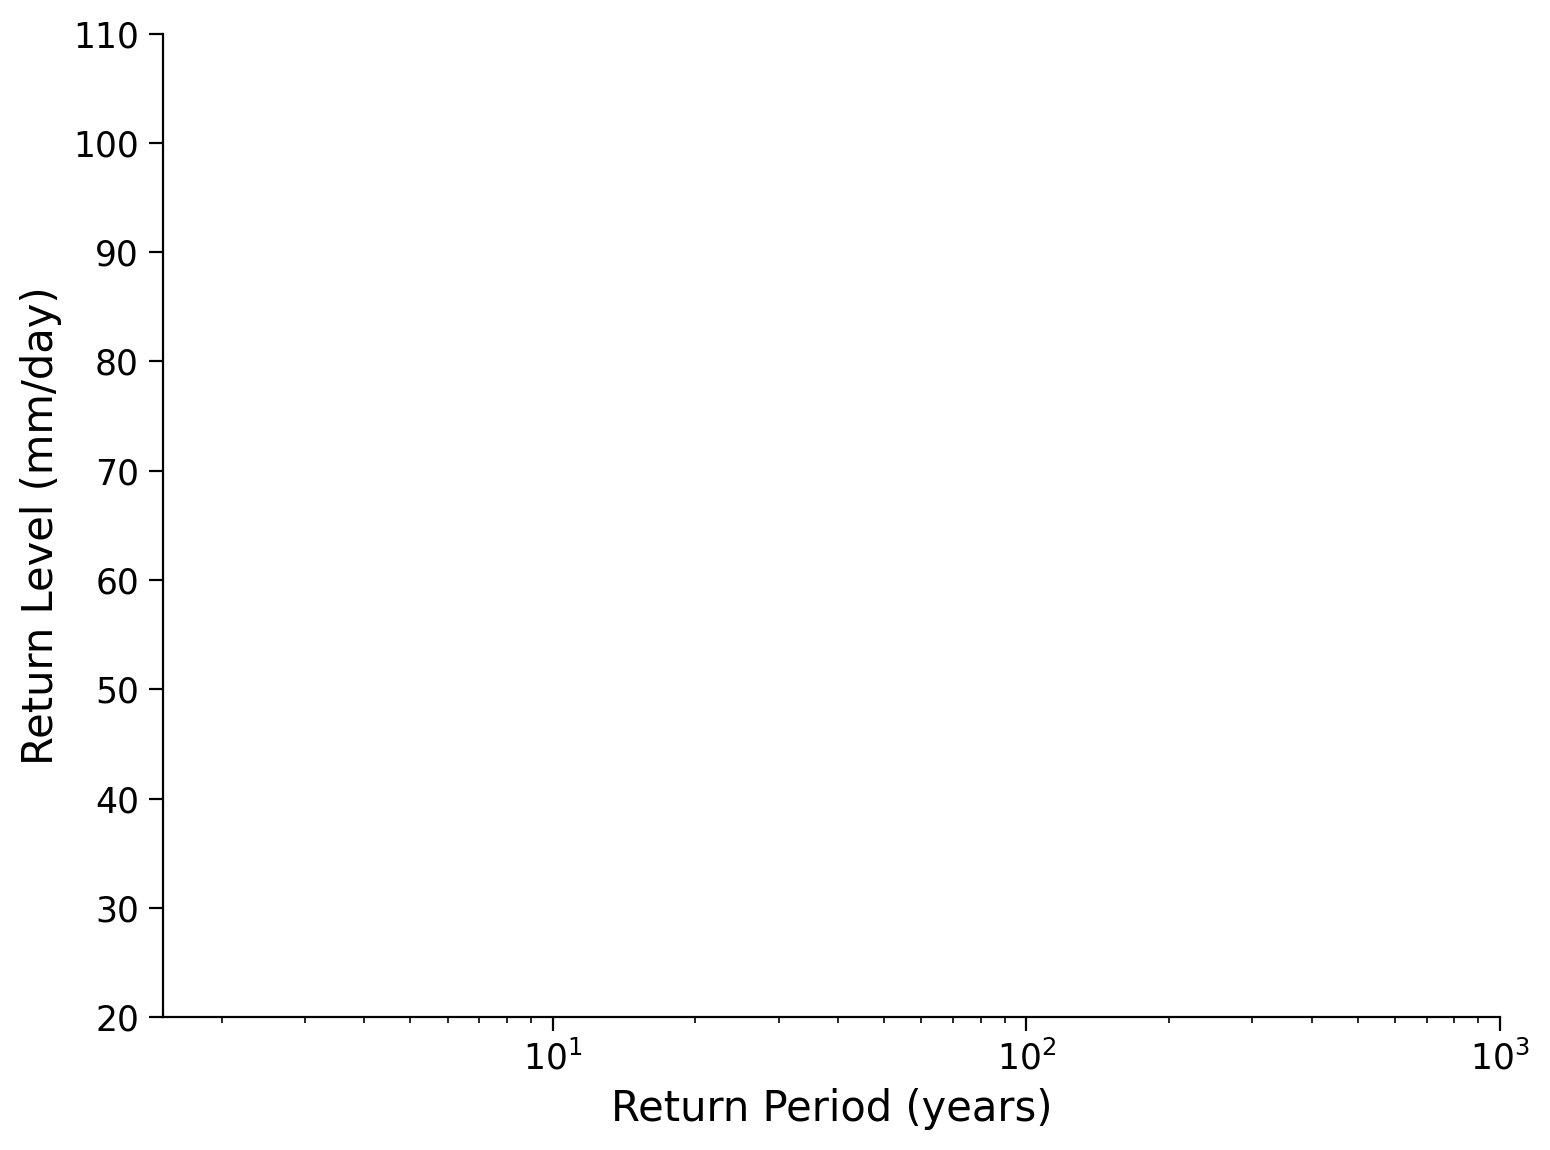

In [43]:
# initalize list to store parameters from samples
params = []

# generate 1000 samples by resampling data with replacement
for i in range(1000):
    ...

# print the estimate of the mean of each parameter and it's confidence intervals
print(
    "Mean estimate: ",
    np.mean(np.array(params), axis=0),
    " and 95% confidence intervals: ",
    ...,
)

# generate years vector
years = np.arange(1.1, 1000, 0.1)

# intialize list for return levels
levels = []

# calculate return levels for each of the 1000 samples
for i in range(1000):
    levels.append(...)
levels = np.array(levels)

# setup plots
fig, ax = plt.subplots()

# find empirical return levels
_ = ...

# plot return mean levels
_ = ...

# plot confidence intervals
_ = ...

# aesthetics
ax.set_xlim(1.5, 1000)
ax.set_ylim(20, 110)
ax.set_xscale("log")
ax.set_xlabel("Return Period (years)")
ax.set_ylabel("Return Level (mm/day)")

[*Click for solution*](https://github.com/neuromatch/climate-course-content/tree/main/tutorials/W2D3_ExtremesandVariability/solutions/W2D3_Tutorial4_Solution_c4127f14.py)

*Example output:*

<img alt='Solution hint' align='left' width=775.0 height=575.0 src=https://raw.githubusercontent.com/neuromatch/climate-course-content/main/tutorials/W2D3_ExtremesandVariability/static/W2D3_Tutorial4_Solution_c4127f14_2.png>



In [44]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Bonus_Coding_Exercise_1")

# Summary
In this tutorial, you learned how to calculate return values based on the Generalized Extreme Value (GEV) distribution. You learned how they are derived from the cumulative distribution function (CDF), and compared them to those from the normal distribution. Finally, you learned how to create confidence intervals for the parameters that define the GEV distribution for a given dataset.

# Resources

Data from this tutorial uses the 0.25 degree precipitation dataset E-OBS. It combines precipitation observations to generate a gridded (i.e. no "holes") precipitation over Europe. We used the precipitation data from the gridpoint at 51 N, 6 E.

The dataset can be accessed using the KNMI Climate Explorer [here](https://climexp.knmi.nl/select.cgi?id=someone@somewhere&field=ensembles_025_rr). The Climate Explorer is a great resource to access, manipulate and visualize climate data, including observations and climate model simulations. It is freely accessible - feel free to explore!